In [6]:

import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')

data['diagnosis'] = data['diagnosis'].replace('B',0);
data['diagnosis'] = data['diagnosis'].replace('M',1);

y = data.diagnosis
X = data.T
x = X[2:]
x = x.T

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
model  = LinearRegression().fit(X_train,y_train)

y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
accuracy_1 = np.round(r2_score(y_test,y_predict)*100)

0.7271016126223576
0.0641088624702941


In [10]:

sfs_forward = SequentialFeatureSelector(LinearRegression(), 
                                        n_features_to_select=4,
                                        direction='forward').fit(x, y)

f_names = np.array(data.columns)
selected = sfs_forward.get_support(indices=True)
print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])
columns_names = list(f_names[selected])

if 'diagnosis' in columns_names:
    columns_names.remove('diagnosis')
if 'id' in columns_names:
    columns_names.remove('id')
print(columns_names)

Selected input features using Forward Stepwise Selection:
 ['symmetry_se' 'fractal_dimension_se' 'compactness_worst'
 'concavity_worst']
['symmetry_se', 'fractal_dimension_se', 'compactness_worst', 'concavity_worst']


In [11]:
x_manip = data[columns_names]

y = data.diagnosis

X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip, y, test_size=0.2, random_state=42)

In [14]:
model_2  = LinearRegression().fit(X_train_manip,y_train_2)
y_predict_2 = model_2.predict(X_test_manip)

print(y_predict_2)
accuracy_2 = np.round(r2_score(y_test_2,y_predict_2)*100)



[ 0.35610147  0.42872564  0.56496563  0.22698903  0.12914939  1.46613434
  0.69894391  0.33888258  0.72665302  0.19910124  0.18637292  0.31043369
  0.12601143  0.41653665  0.28963437  0.06913693  0.15158104  0.01810127
 -0.07712446  0.69460648  0.40577775  0.26560084  1.11206089 -0.0405569
  0.14440816 -0.03879072  0.42715697  0.17485215  0.19497701  0.96253839
  0.15988935  0.08300267 -0.03015927  0.16758774  0.04493351  0.15144173
  0.15971832  0.12127906  0.58092683  0.11332813  0.08478117  0.51749884
  0.36932803  0.18227041  0.07273082  0.46224204  0.16052471 -0.04274853
  0.41551559  0.45593519  0.61590636  0.9037556   0.48858047  0.06574335
 -0.12074353  0.28421763  0.08924321  0.91232361  0.77314423  0.14922216
  0.23784255  0.6626303   0.51359067  0.20986701  0.02860363  0.56930575
  1.02598176  1.34995047  0.1661401   0.48987585  0.55258703  0.62961592
  0.13932092  0.86078104 -0.20583268  0.26691493  0.02866552  0.51486544
  0.11532108  0.29866767  0.47074773 -0.01638175  0.

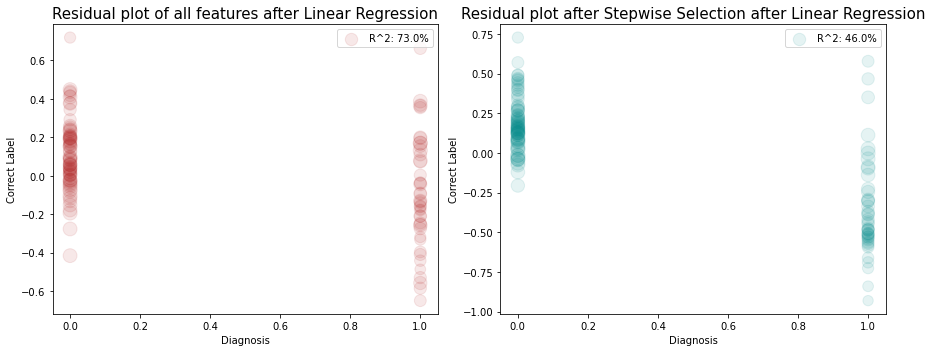

In [17]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_predict - y_test, marker='o',s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'FireBrick',label = "R^2: "+str(accuracy_1)+"%")
ax[0].set_title('Residual plot of all features after Linear Regression', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test_2, y_predict_2 - y_test_2,s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'DarkCyan',label = "R^2: "+str(accuracy_2)+"%")
ax[1].set_title('Residual plot after Stepwise Selection after Linear Regression', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()